In [33]:
# Imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.combine import SMOTEENN
from collections import Counter

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
def metrics_score(actual, predicted):
    print(classification_report_imbalanced(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=['Not Winner', 'Winner'], yticklabels=['Not Winner', 'Winner'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [35]:
# Load the data
ml_df = pd.read_csv('Processed_Oscar_movie_Details.csv')
ml_df


,movie_id,movie_name,release_year,original_release_date,movie_length,rating,movie_producer,movie_director,movie_actor,imdb_rating,...,movie_producer_main,movie_director_main,movie_actor_1,movie_actor_2,award_Nominee,award_Winner,imdb_rating_scaled,tomatometer_rating_scaled,audience_rating_scaled,avg_rating
0,1,Wings,1927,8/12/27,144,PG-13,Famous Players-Lasky,William Wellman,"Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",7.5,...,Famous Players-Lasky,William Wellman,Clara Bow,Charles 'Buddy' Rogers,0,1,7.5,9.3,7.8,8.7
1,2,7th Heaven,1927,NaN,110,None,Fox,,,7.7,...,Fox,,,NaN,1,0,7.7,0.0,0.0,7.7
2,3,The Racket,1928,NaN,84,None,The Caddo Company,,,6.7,...,The Caddo Company,,,NaN,1,0,6.7,0.0,0.0,6.7
3,4,The Broadway Melody,1929,2/1/29,100,NR,Metro-Goldwyn-Mayer,Harry Beaumont,"Anita Page, Bessie Love, Charles King, Jed Pro...",5.7,...,Metro-Goldwyn-Mayer,Harry Beaumont,Anita Page,Bessie Love,0,1,5.7,3.3,2.1,4.1
4,5,Alibi,1929,NaN,91,None,Feature Productions,,,5.8,...,Feature Productions,,,NaN,1,0,5.8,0.0,0.0,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,567,Mank,2020,NaN,131,None,"Ceán Chaffin, Eric Roth, and Douglas Urbanski",,,6.9,...,Ceán Chaffin,,,NaN,1,0,6.9,0.0,0.0,6.9
567,568,Minari,2020,NaN,115,None,Christina Oh,,,7.5,...,Christina Oh,,,NaN,1,0,7.5,0.0,0.0,7.5
568,569,Promising Young Woman,2020,NaN,113,None,"Ben Browning, Ashley Fox, Emerald Fennell, and...",,,7.5,...,Ben Browning,,,NaN,1,0,7.5,0.0,0.0,7.5
569,570,Sound of Metal,2019,NaN,120,None,Bert Hamelinck and Sacha Ben Harroche,,,7.8,...,Bert Hamelinck and Sacha Ben Harroche,,,NaN,1,0,7.8,0.0,0.0,7.8


In [36]:
list_of_column_names = list(ml_df.columns)
print('List of column names : ',
      list_of_column_names)

List of column names :  ['movie_id', 'movie_name', 'release_year', 'original_release_date', 'movie_length', 'rating', 'movie_producer', 'movie_director', 'movie_actor', 'imdb_rating', 'imdb_votes', 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count', 'us_gross_income', 'worldwide_gross_income', 'production_budget', 'oscar_year', 'award', 'genre_Action', 'genre_Adventure', 'genre_Animation', 'genre_Biography', 'genre_Comedy', 'genre_Crime', 'genre_Drama', 'genre_Family', 'genre_Fantasy', 'genre_Film-Noir', 'genre_History', 'genre_Horror', 'genre_Music', 'genre_Musical', 'genre_Mystery', 'genre_Romance', 'genre_Sci-Fi', 'genre_Sport', 'genre_Thriller', 'genre_War', 'genre_Western', 'movie_producer_main', 'movie_director_main', 'movie_actor_1', 'movie_actor_2', 'award_Nominee', 'award_Winner', 'imdb_rating_scaled', 'tomatometer_rating_scaled', 'audience_rating_scaled', 'avg_rating']


In [37]:
df = ml_df.loc[:,["release_year", "movie_length", 
                 "genre_Action", "genre_Adventure", "genre_Animation", "genre_Biography", 
                 "genre_Comedy", "genre_Crime", "genre_Drama", "genre_Family", 
                 "genre_Fantasy", "genre_Film-Noir", "genre_History", "genre_Horror", 
                 "genre_Music", "genre_Musical", "genre_Mystery", "genre_Romance", 
                 "genre_Sci-Fi", "genre_Sport", "genre_Thriller", "genre_War", 
                 "genre_Western","avg_rating", "award_Winner"]]

df

,release_year,movie_length,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Drama,genre_Family,...,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Sport,genre_Thriller,genre_War,genre_Western,avg_rating,award_Winner
0,1927,144,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,True,False,8.7,1
1,1927,110,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,7.7,0
2,1928,84,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,6.7,0
3,1929,100,False,False,False,False,False,False,True,False,...,True,False,True,False,False,False,False,False,4.1,1
4,1929,91,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,5.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,2020,131,False,False,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,6.9,0
567,2020,115,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,7.5,0
568,2020,113,False,False,False,False,False,True,True,False,...,False,False,False,False,False,True,False,False,7.5,0
569,2019,120,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,7.8,0


In [38]:
df = df.replace({True: 1, False: 0})
df["genre_Drama"]

0      1
1      1
2      1
3      1
4      0
      ..
566    1
567    1
568    1
569    1
570    1
Name: genre_Drama, Length: 571, dtype: int64

In [39]:
# Create our features
X = df.drop("award_Winner", axis=1)
y = df["award_Winner"]

In [40]:
# Fill null values with 0
X = X.fillna(0)

In [41]:
X.columns

Index(['release_year', 'movie_length', 'genre_Action', 'genre_Adventure',
       'genre_Animation', 'genre_Biography', 'genre_Comedy', 'genre_Crime',
       'genre_Drama', 'genre_Family', 'genre_Fantasy', 'genre_Film-Noir',
       'genre_History', 'genre_Horror', 'genre_Music', 'genre_Musical',
       'genre_Mystery', 'genre_Romance', 'genre_Sci-Fi', 'genre_Sport',
       'genre_Thriller', 'genre_War', 'genre_Western', 'avg_rating'],
      dtype='object')

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,
   y, random_state=1, stratify=y)

In [43]:
# Resample the training data with the BalancedRandomForestClassifier
brf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
brf_model = brf_model.fit(X_train, y_train)

In [44]:
# Calculated the balanced accuracy score
y_pred = brf_model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.6126811594202899

In [45]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[74, 46],
       [ 9, 14]], dtype=int64)

In [46]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.89      0.62      0.61      0.73      0.61      0.38       120
          1       0.23      0.61      0.62      0.34      0.61      0.38        23

avg / total       0.79      0.62      0.61      0.67      0.61      0.38       143



                   pre       rec       spe        f1       geo       iba       sup

          0       0.89      0.62      0.61      0.73      0.61      0.38       120
          1       0.23      0.61      0.62      0.34      0.61      0.38        23

avg / total       0.79      0.62      0.61      0.67      0.61      0.38       143



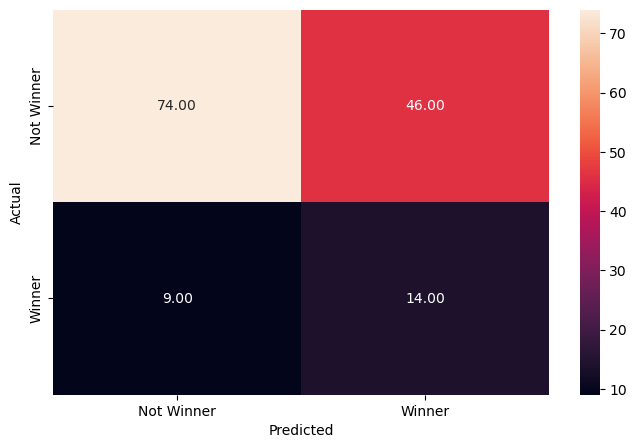

In [47]:
metrics_score(y_test,y_pred)


In [48]:
# Train the data with EasyEnsembleClassifier
eec_model = EasyEnsembleClassifier(n_estimators=100, random_state=1)
eec_model = eec_model.fit(X_train, y_train)

In [49]:
# Calculated the balanced accuracy score
y_pred_eec = eec_model.predict(X_test)
balanced_accuracy_score(y_test, y_pred_eec)

0.5760869565217391

In [50]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred_eec)

array([[60, 60],
       [ 8, 15]], dtype=int64)

In [51]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_eec))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.50      0.65      0.64      0.57      0.32       120
          1       0.20      0.65      0.50      0.31      0.57      0.33        23

avg / total       0.77      0.52      0.63      0.58      0.57      0.32       143



                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.50      0.65      0.64      0.57      0.32       120
          1       0.20      0.65      0.50      0.31      0.57      0.33        23

avg / total       0.77      0.52      0.63      0.58      0.57      0.32       143



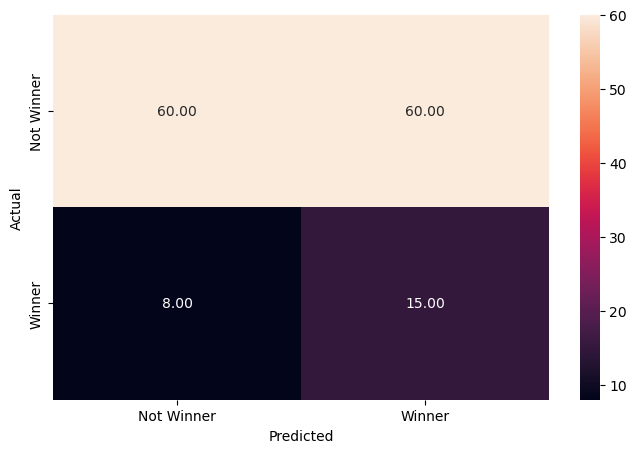

In [52]:
metrics_score(y_test,y_pred_eec)

In [53]:
# Resample the training data with SMOTEENN
smote_enn = SMOTEENN(random_state=1)
X_resampled4, y_resampled4 = smote_enn.fit_resample(X, y)
Counter(y_resampled4)

Counter({0: 192, 1: 287})

In [54]:
# Train the Logistic Regression model using the resampled data
com_model = LogisticRegression(solver='lbfgs', random_state=1)
com_model.fit(X_resampled4, y_resampled4)

C:\Users\shef1\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=1)

In [55]:
# Calculated the balanced accuracy score
y_pred4 = com_model.predict(X_test)
balanced_accuracy_score(y_test, y_pred4)

0.6085144927536232

In [56]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred4)

array([[73, 47],
       [ 9, 14]], dtype=int64)

In [57]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred4))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.89      0.61      0.61      0.72      0.61      0.37       120
          1       0.23      0.61      0.61      0.33      0.61      0.37        23

avg / total       0.78      0.61      0.61      0.66      0.61      0.37       143



                   pre       rec       spe        f1       geo       iba       sup

          0       0.89      0.61      0.61      0.72      0.61      0.37       120
          1       0.23      0.61      0.61      0.33      0.61      0.37        23

avg / total       0.78      0.61      0.61      0.66      0.61      0.37       143



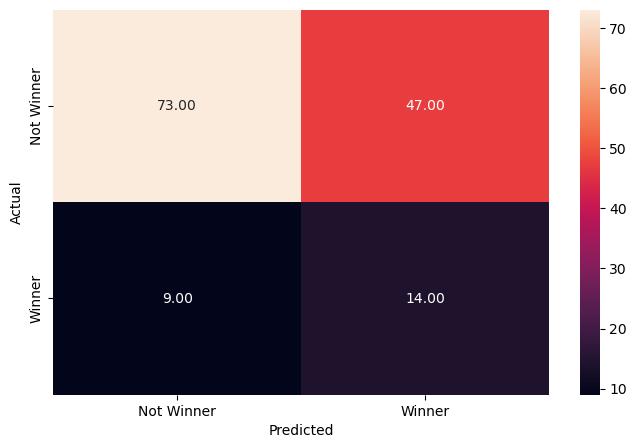

In [58]:
metrics_score(y_test,y_pred4)